In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("Zomato_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [48]:
def split(value):
    val=float(value.split("/")[0])
    return val

What type of restaurant do the majority of customers order from?

C:\Users\prakh\AppData\Local\Temp\ipykernel_5084\970715181.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'],palette='magma')


<Axes: xlabel='listed_in(type)', ylabel='count'>

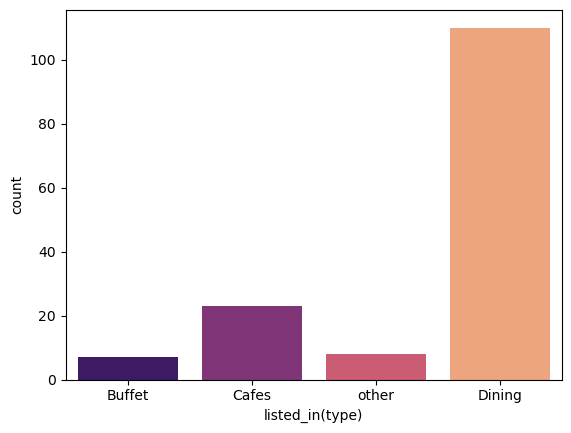

In [52]:
sns.countplot(x=df['listed_in(type)'],palette='magma')

How many votes has each type of restaurant received from customers?

In [68]:
# Total votes received by each restaurant type
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
votes_by_type

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

 What are the ratings that the majority of restaurants have received?

C:\Users\prakh\AppData\Local\Temp\ipykernel_5084\2960558067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rate'],palette='rainbow')


<Axes: xlabel='rate', ylabel='count'>

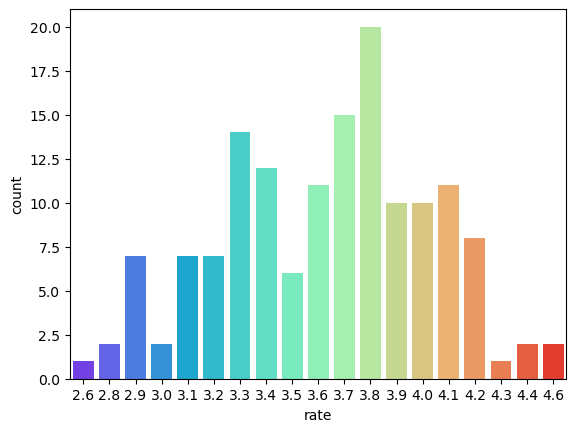

In [70]:
sns.countplot(x=df['rate'],palette='rainbow')

Zomato has observed that most couples order most of their food online. What is their average
spending on each order?

In [73]:
df[df['online_order']=='Yes']['approx_cost(for two people)'].mean()

np.float64(510.3448275862069)

Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

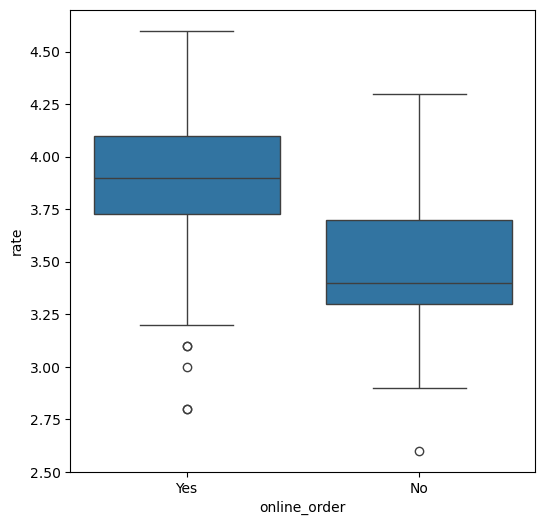

In [77]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate' , data = df)

Which type of restaurant received more offline orders, so that Zomato can provide customers with
some good offers?

In [79]:
df[df['online_order']=='No']['listed_in(type)'].value_counts()

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64

What are the unique types of listings (`listed_in(type)`)?

In [80]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

Are there any missing or null values in the dataset?

In [81]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
rate_cleaned                   0
dtype: int64

What is the average cost for two people across the entire dataset?

In [82]:
df['approx_cost(for two people)'].mean()

np.float64(418.2432432432432)

Which restaurants have the highest and lowest ratings?

In [96]:
top=df.groupby('name')['rate'].mean().sort_values(ascending=False).head()

C:\Users\prakh\AppData\Local\Temp\ipykernel_5084\3322235108.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top.index,x=top.values,palette='viridis')


Text(0.5, 0, 'Rating')

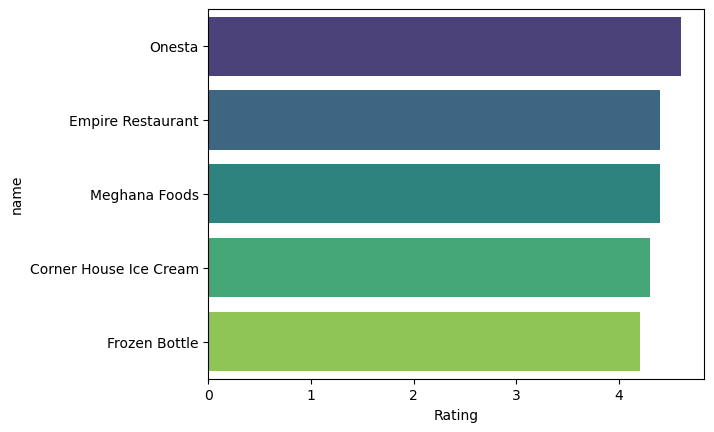

In [109]:
sns.barplot(y=top.index,x=top.values,palette='viridis')
plt.xlabel("Rating")

How many restaurants offer online ordering and table booking?

In [104]:
df[(df['online_order']=='Yes') & (df['book_table']=='Yes')].shape[0]

7

Which restaurant has received the highest number of votes?

In [110]:
df.groupby("name")['votes'].sum().sort_values(ascending=False).head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   rate_cleaned                 148 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.4+ KB


What is the average rating per restaurant type (`listed_in(type)`)?

In [111]:
df.groupby("listed_in(type)")['rate'].mean()

listed_in(type)
Buffet    3.842857
Cafes     3.765217
Dining    3.571818
other     3.912500
Name: rate, dtype: float64

What is the average cost for two by type of listing (e.g., Buffet vs Cafes)?

In [123]:
dt=df.groupby("listed_in(type)")['approx_cost(for two people)'].mean()

C:\Users\prakh\AppData\Local\Temp\ipykernel_5084\4144454619.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt.index,y=dt.values,palette='rainbow')


<Axes: xlabel='listed_in(type)'>

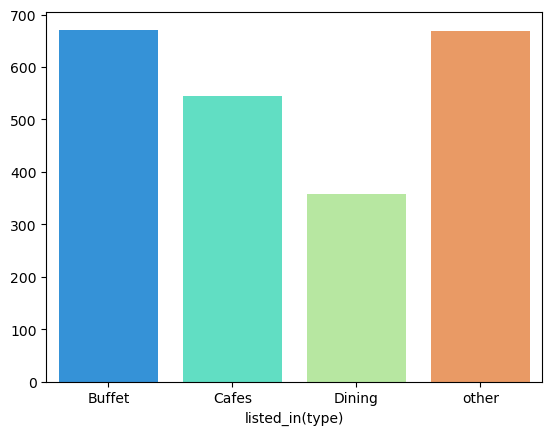

In [125]:
sns.barplot(x=dt.index,y=dt.values,palette='rainbow')

Which restaurants have high ratings but low votes? (Hidden gems!)

In [131]:
df.sort_values(['rate','votes'],ascending=[False,True])[['name','rate','votes']].head(10)

,name,rate,votes
7,Onesta,4.6,2556
44,Onesta,4.6,2556
86,Meghana Foods,4.4,4401
38,Empire Restaurant,4.4,4884
52,Corner House Ice Cream,4.3,345
81,Frozen Bottle,4.2,146
11,Cafe Shuffle,4.2,150
12,The Coffee Shack,4.2,164
60,Peppy Peppers,4.2,244
57,Wamama,4.2,354


Create a bar chart showing count of restaurants per listing type.

In [132]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rate_cleaned
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,4.1
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,4.1
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.7
4,Grand Village,No,No,3.8,166,600,Buffet,3.8


In [134]:
typ=df['listed_in(type)'].value_counts()

C:\Users\prakh\AppData\Local\Temp\ipykernel_5084\2281111159.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=typ.values,y=typ.index,palette='dark')


Text(0.5, 0, 'No. of Restaurants')

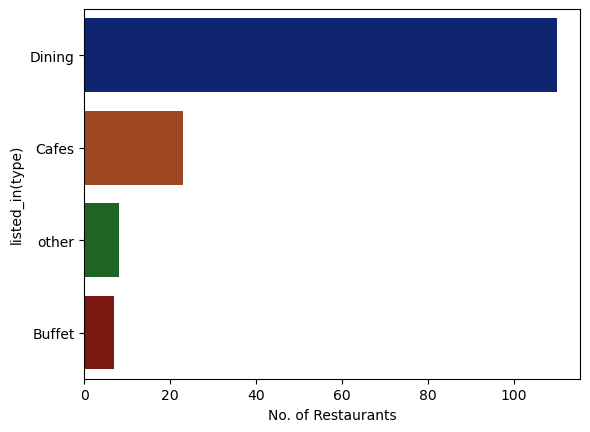

In [137]:
sns.barplot(x=typ.values,y=typ.index,palette='dark')
plt.xlabel("No. of Restaurants")

Top 10 most voted restaurants per type.

In [144]:
# Step 1: Group by 'listed_in(type)' and sort within each group by votes
top_10_per_type = df.sort_values('votes', ascending=False).groupby('listed_in(type)').head(10)

# Step 2: Optional – Select columns to display
top_10_per_type = top_10_per_type[['name', 'listed_in(type)', 'votes', 'rate']]

top_10_per_type

,name,listed_in(type),votes,rate
38,Empire Restaurant,other,4884,4.4
86,Meghana Foods,Dining,4401,4.4
7,Onesta,Cafes,2556,4.6
44,Onesta,other,2556,4.6
65,Kabab Magic,Dining,1720,4.1
37,Szechuan Dragon,Dining,1647,4.2
54,Roving Feast,Dining,1047,4.0
2,San Churro Cafe,Buffet,918,3.8
14,San Churro Cafe,Cafes,918,3.8
67,Gustoes Beer House,Dining,868,4.1
